In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data=pd.read_csv('Customer Segmentation.csv')

In [4]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [5]:
x=data.iloc[:,3].values
y=data.iloc[:,4].values

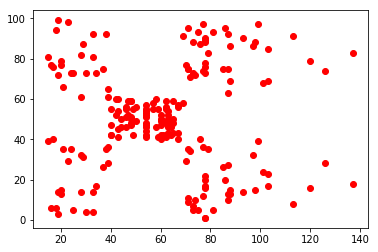

In [6]:
plt.scatter(x,y,color='red')

In [8]:
#from our naked eye we can see 5 clusters. but we will let the algorithm decide this

In [9]:
from sklearn.cluster import KMeans

In [10]:
x=data.iloc[:,3:].values
x.shape

(200, 2)

In [12]:
wcss=[]

for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(x)
    wcss.append(km.inertia_)

In [13]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37265.86520484347,
 30259.65720728547,
 25018.78161341407,
 21809.927562615183,
 19636.753964898147]

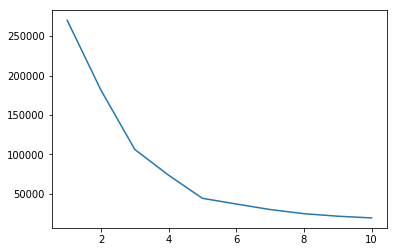

In [14]:
plt.plot(range(1,11),wcss)

In [17]:
#this graph is known as elbow curve
#the elbow point gives the no. of clusters needed for the data

In [18]:
#now from where i know the no. of clusters needed is 5

In [21]:
km=KMeans(n_clusters=5)
km.fit(x)
y=km.predict(x)

In [22]:
y

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 3,
       4, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2,
       3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [24]:
x[y==4] #this gives us the 5th cluster

array([[15, 39],
       [16,  6],
       [17, 40],
       [18,  6],
       [19,  3],
       [19, 14],
       [20, 15],
       [20, 13],
       [21, 35],
       [23, 29],
       [24, 35],
       [25,  5],
       [28, 14],
       [28, 32],
       [29, 31],
       [30,  4],
       [33,  4],
       [33, 14],
       [34, 17],
       [37, 26],
       [38, 35],
       [39, 36],
       [39, 28]], dtype=int64)

In [26]:
x[y==4,1] #this gives us the 5th cluster's 2nd column

array([39,  6, 40,  6,  3, 14, 15, 13, 35, 29, 35,  5, 14, 32, 31,  4,  4,
       14, 17, 26, 35, 36, 28], dtype=int64)

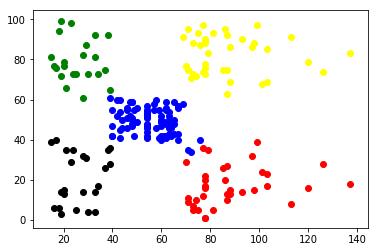

In [27]:
plt.scatter(x[y==0,0],x[y==0,1],color="red")
plt.scatter(x[y==1,0],x[y==1,1],color="green")
plt.scatter(x[y==2,0],x[y==2,1],color="yellow")
plt.scatter(x[y==3,0],x[y==3,1],color="blue")
plt.scatter(x[y==4,0],x[y==4,1],color="black")